# # Global Video Game Sales

#### Project on global video game sales:
#### By:- Aayush Raju Bade

## ---------------------------------------------------------------------------------------------------------

# # Contents:-

### 1) Data Collection

### 2) Data Cleaning/Processing

### 3) Data Analysis/Visualization




## ---------------------------------------------------------------------------------------------------------

In [2]:
# Importing the libraries required for the Analysis!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn # Importing warnings to get rid of the warnings

# 1) Data Collection:-

In [3]:
# Data-Source = Kaggle

df = pd.read_csv('Video_Games_Sales.csv')
df1 = df.copy() # Creating a copy of the data set so that changes don't reflect on our original data
df.head() # This shows the 1st 5 values of the data-set

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


## ---------------------------------------------------------------------------------------------------------

# 2) Data Cleaning/Processing:-

In [5]:
# Sorting df according to the Year Published & getting rid of the Nan values:

df.sort_values(by = 'Year',inplace =True,ascending=True)
df.dropna(subset = ['Year'],inplace = True)


# (i) Creating this data set for analysing Global Sales of All Genres of video games

Total_Global_Sales = df.groupby('Year')['Global'].sum().reset_index()
Total_Global_Sales = pd.DataFrame(Total_Global_Sales)
Total_Global_Sales['Year'] = Total_Global_Sales['Year'].astype(int)

# (ii) Creating this data set for analysing Yearly global sales per genre

Yearly_Global_Sales = df.groupby(['Genre','Year'])['Global'].sum().reset_index()
Yearly_Global_Sales = Yearly_Global_Sales.sort_values(by = 'Year')
Yearly_Global_Sales['Year'] = Yearly_Global_Sales['Year'].astype(int)


# (iii) Creating this data set for analysing sales per genre for all time

Sales_Per_Genre = Yearly_Global_Sales.groupby('Genre')['Global'].sum().reset_index()

# (iv) Creating this data set for analysing Sales per Publisher for all time

Sales_Per_Publisher = df.groupby('Publisher')['Global'].sum().reset_index()

# (v) Creating this data set for analysing changing trends of most fav genre over the years

trends = df.groupby(['Genre','Year'])['Global'].sum().reset_index()
trends = trends.sort_values(by = 'Year')
trends['Year'] = trends['Year'].astype(int)

# (vi) Creating this data set for analysing which Platform is most popular
# The most sold games gives an idea that most of the consumers have which platform
Platform_Pop = df.groupby('Platform')['Global'].sum().reset_index()

## ---------------------------------------------------------------------------------------------------------

# 3) Data Analysis/Visualization:-

## (i) Analysing Global Sales For All Genres Of Video Games:-




In [6]:
Total_Global_Sales.head() # Printing the data-set for reference

,Year,Global
0,1983,10.96
1,1984,45.66
2,1985,49.57
3,1986,27.17
4,1987,17.06


Text(0, 0.5, 'Global Sales')

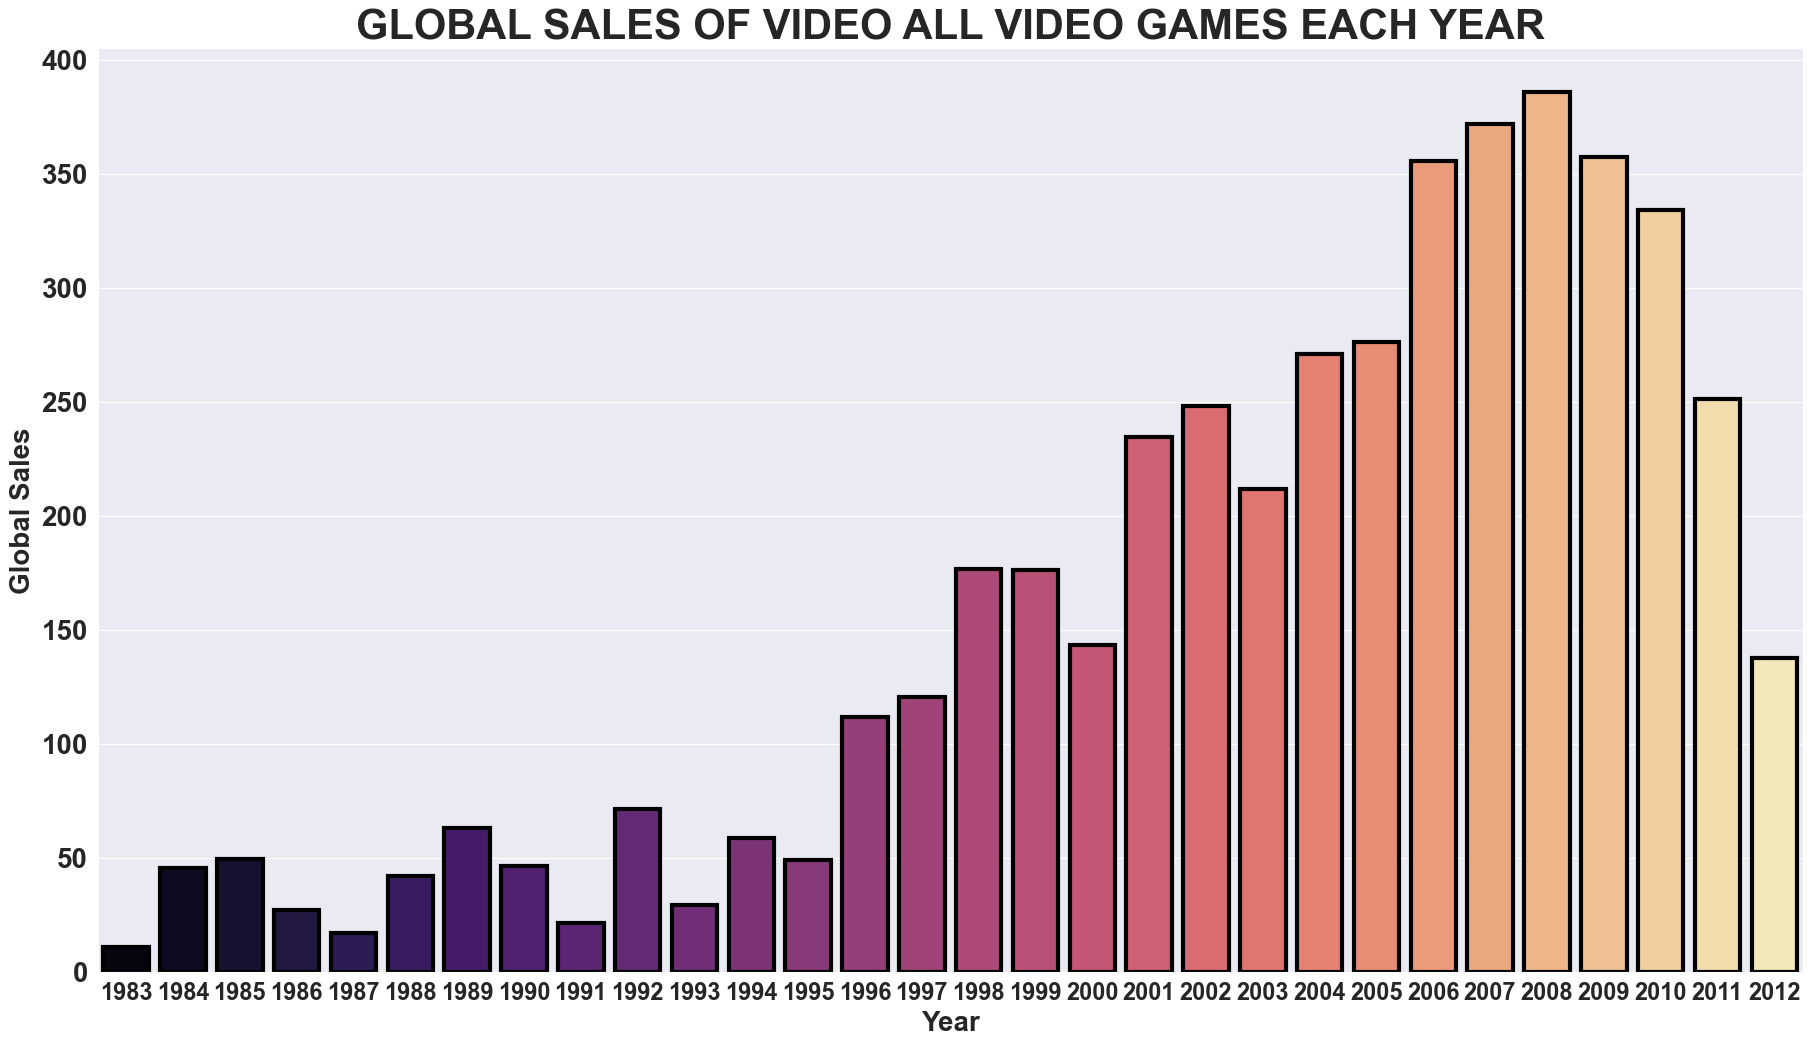

In [7]:
# We'll use our Total_Global_Sales data-set and plot a barplot to analyse it:

plt.figure(figsize = (22,12)) # Scaling the figure size for better readability

sns.set_style('darkgrid')
plt.xticks(fontsize =17,fontweight = 'bold')   # Beautifying the plot by adding grids and inc. ticks size
plt.yticks(fontsize = 20,fontweight = 'bold') 

plt.title('GLOBAL SALES OF VIDEO ALL VIDEO GAMES EACH YEAR',fontsize = 30,fontweight = 'bold') # Adding title

sns.barplot(data = Total_Global_Sales , x ='Year',y = 'Global',palette = 'magma',lw =3, edgecolor = 'black') # Plotting

plt.xlabel('Year', fontsize = 20,fontweight = 'bold')             # Adding labels to x & y axis
plt.ylabel('Global Sales', fontsize = 20,fontweight = 'bold') 

In [8]:
Total_Global_Sales.loc[Total_Global_Sales['Year'] == 2008] # Getting the global sales value in the year 2008 as it has made maximum sales

,Year,Global
25,2008,385.92


In [9]:
Total_Global_Sales.loc[Total_Global_Sales['Year'] == 1983]

,Year,Global
0,1983,10.96


### Analysis:-

1) maximum video game units (385.92) were sold in the year 2008 

2) minimum units were sold (10.96) were sold in the year 1983

3) The global sales increased from 1983 to 2008 , then after that the global sales dropped significantly till 2012
   This implies people loved the old video game titles more than the latest ones
   

## ---------------------------------------------------------------------------------------------------------

## (ii) Analysing Global Sales Per Genre Each Year:-

In [10]:
Yearly_Global_Sales.head() # Printing the data-set for reference

,Genre,Year,Global
67,Misc,1983,2.14
88,Platform,1983,5.62
231,Sports,1983,3.20
116,Puzzle,1984,1.10
138,Racing,1984,5.68


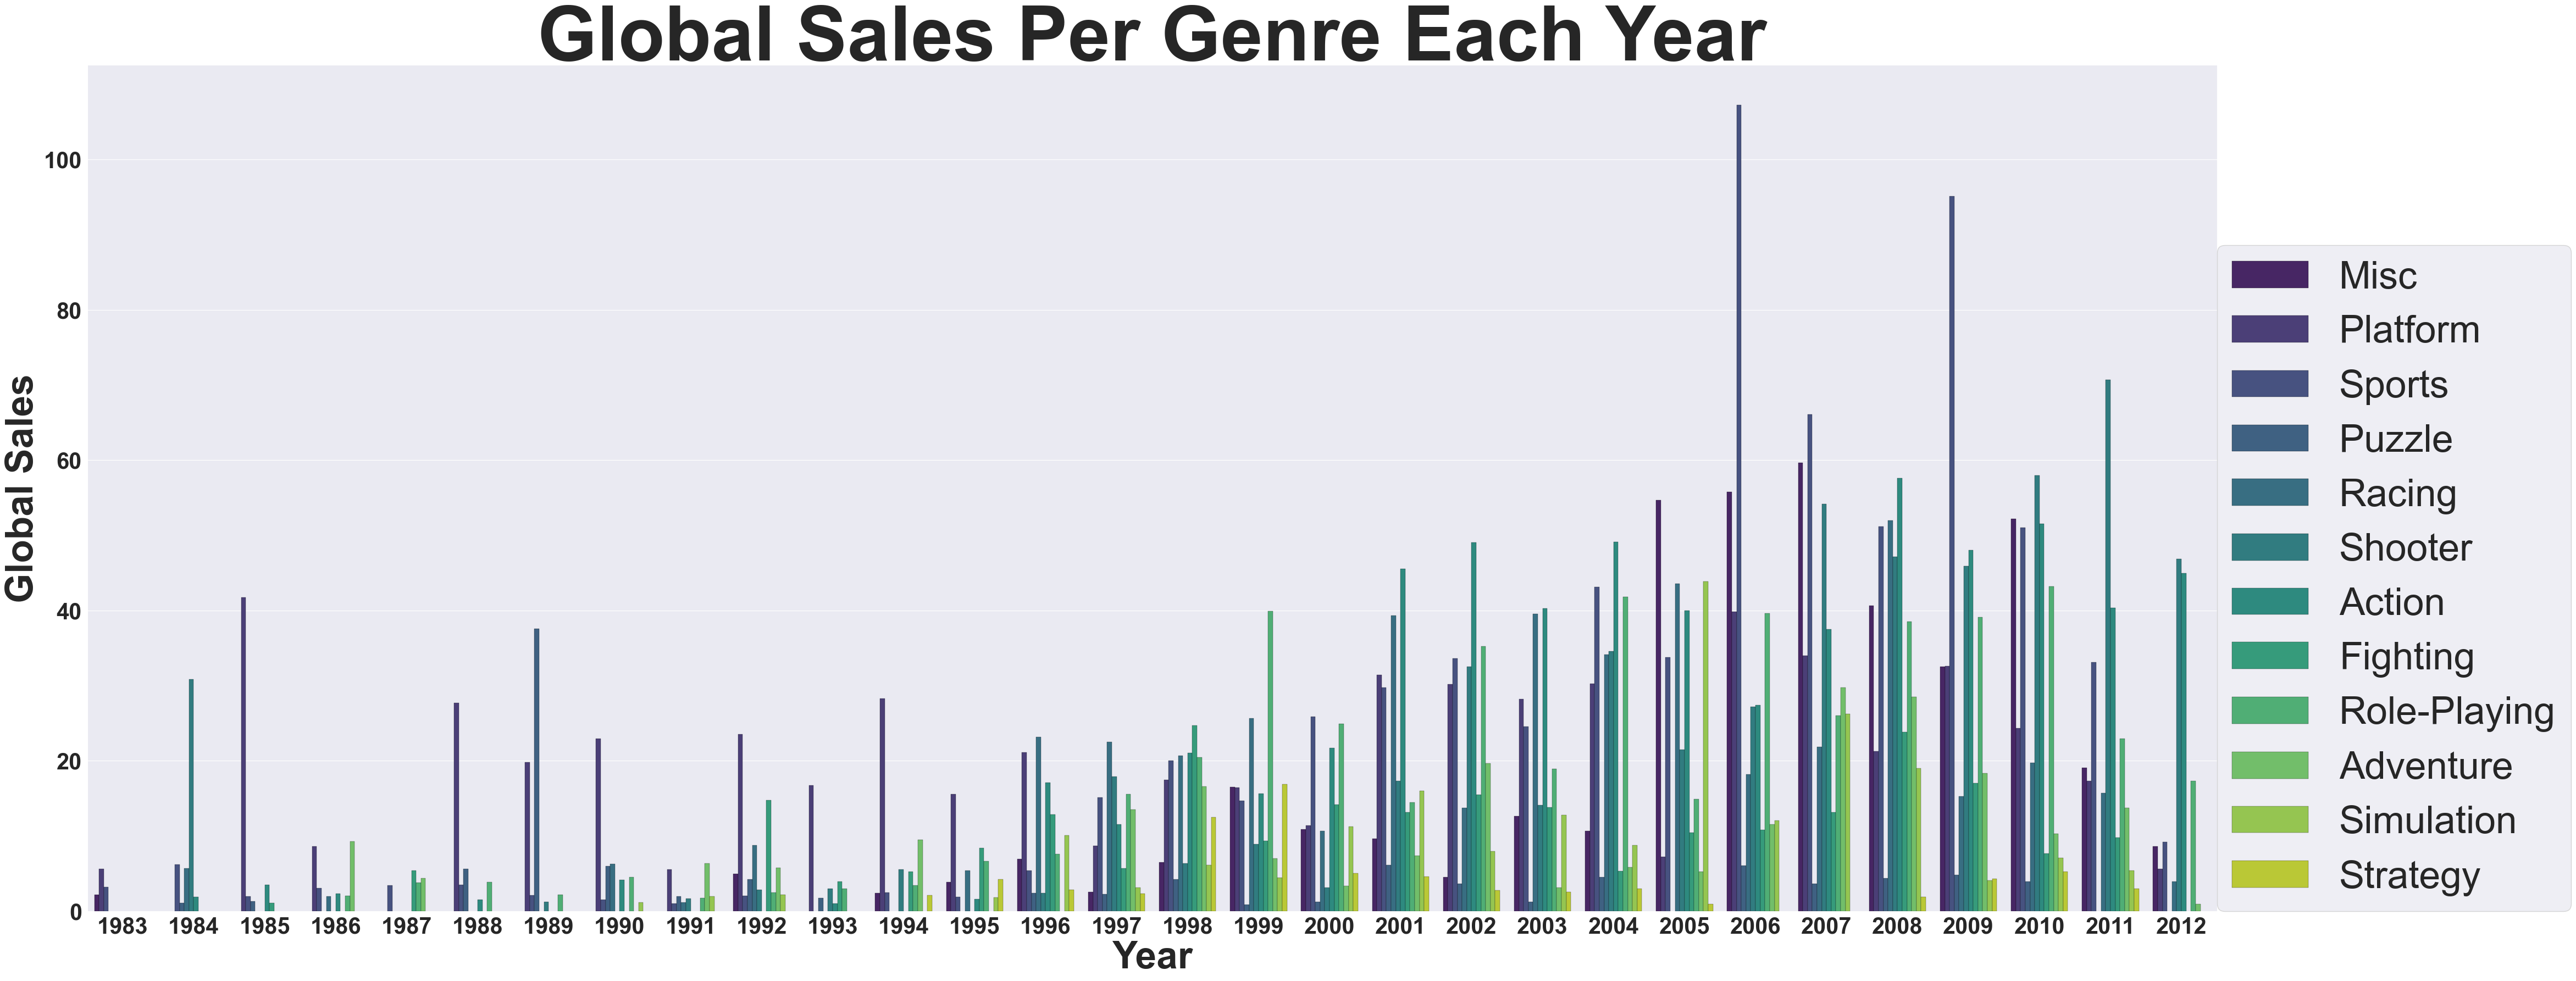

In [11]:
# We'll use our Yearly_Global_Sales data-set and plot a barplot to analyse it:

plt.figure(figsize = (50,20)) # Scaling the figure size for better readability

sns.set_style('darkgrid')
plt.xticks(fontsize =30,fontweight = 'bold')   # Beautifying the plot by adding grids and inc. ticks size
plt.yticks(fontsize = 30,fontweight = 'bold') 

plt.title('Global Sales Per Genre Each Year',fontsize = 100,fontweight = 'bold') # Adding title

sns.barplot(data = Yearly_Global_Sales , x ='Year',y = 'Global',palette = 'viridis',lw =0.2, edgecolor = 'black',hue = 'Genre') # Plotting

plt.xlabel('Year', fontsize = 50,fontweight = 'bold')             # Adding labels to x & y axis
plt.ylabel('Global Sales', fontsize = 50,fontweight = 'bold') 

plt.legend(fontsize = 50,loc = (1,0))

<Axes: title={'center': 'GENRE WISE SALES IN 2005'}, xlabel='Genre', ylabel='Global'>

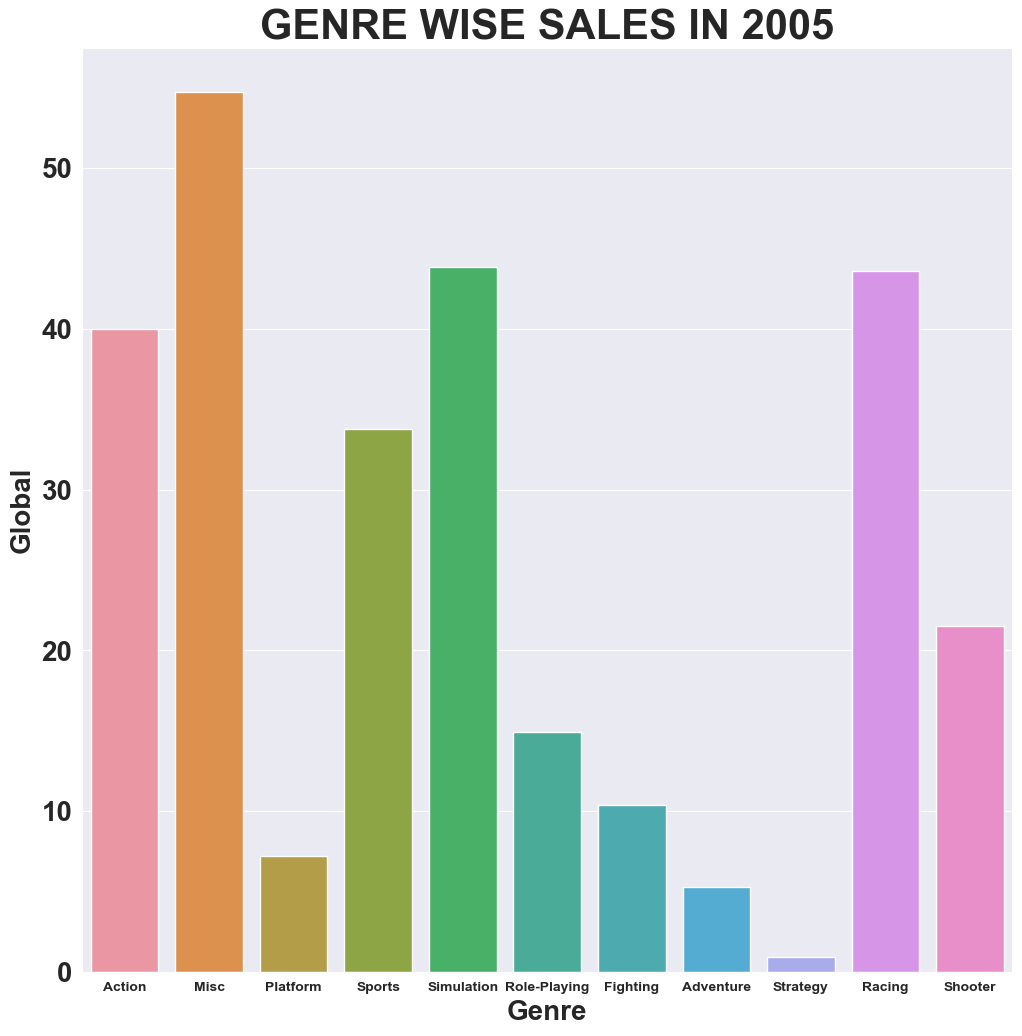

In [12]:
# Let's Analyse 2005 separately

plt.figure(figsize = (12,12)) # Scaling the figure size for better readability

sns.set_style('darkgrid')
plt.xticks(fontsize =10,fontweight = 'bold')   # Beautifying the plot by adding grids and inc. ticks size
plt.yticks(fontsize = 20,fontweight = 'bold') 

plt.title('GENRE WISE SALES IN 2005',fontsize = 30,fontweight = 'bold') # Adding title

plt.xlabel('Genre', fontsize = 20,fontweight = 'bold')             # Adding labels to x & y axis
plt.ylabel('Global Sales', fontsize = 20,fontweight = 'bold') 

sns.barplot(data = (Yearly_Global_Sales.loc[Yearly_Global_Sales['Year'] == 2005]),x = 'Genre',y = 'Global')

<Axes: title={'center': 'GENRE WISE SALES IN 2012'}, xlabel='Genre', ylabel='Global'>

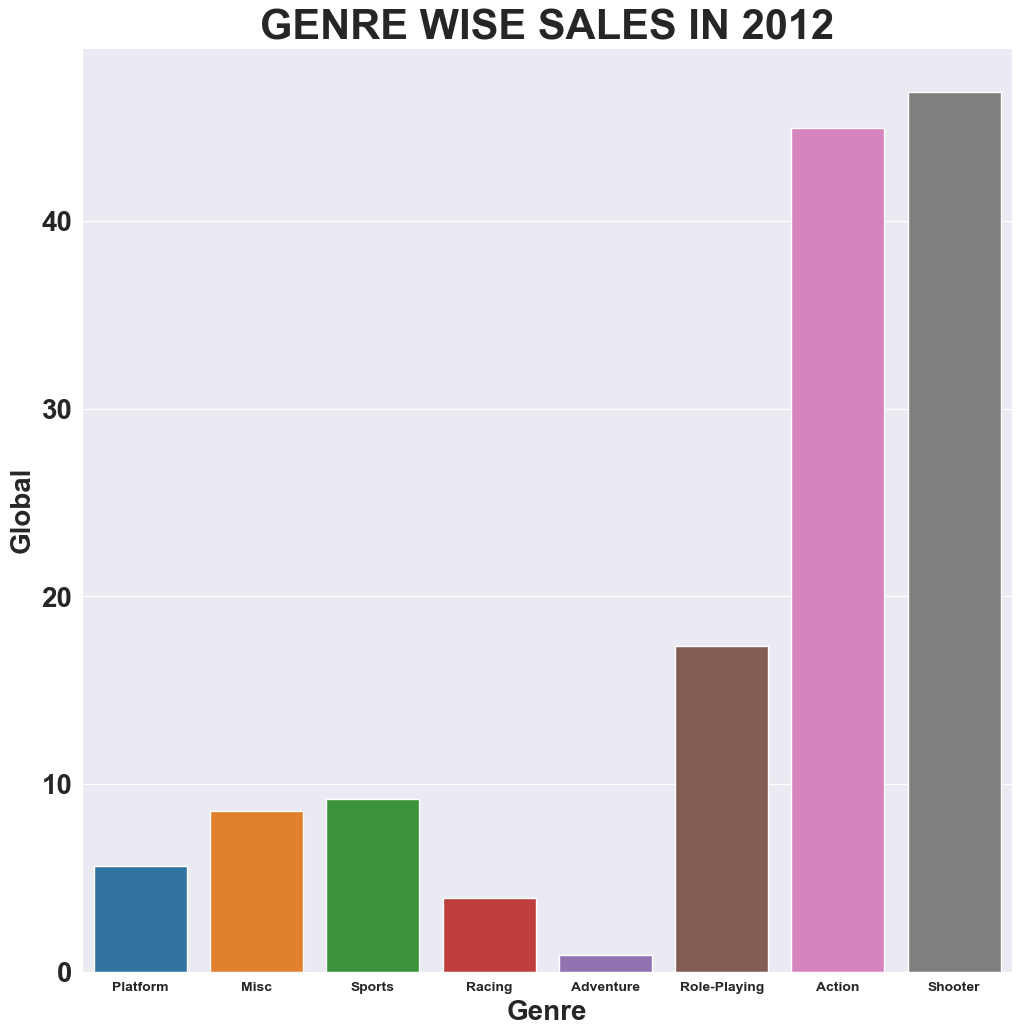

In [13]:
# Let's Analyse 2012 separately

plt.figure(figsize = (12,12)) # Scaling the figure size for better readability

sns.set_style('darkgrid')
plt.xticks(fontsize =10,fontweight = 'bold')   # Beautifying the plot by adding grids and inc. ticks size
plt.yticks(fontsize = 20,fontweight = 'bold') 

plt.title('GENRE WISE SALES IN 2012',fontsize = 30,fontweight = 'bold') # Adding title

plt.xlabel('Genre', fontsize = 20,fontweight = 'bold')             # Adding labels to x & y axis
plt.ylabel('Global Sales', fontsize = 20,fontweight = 'bold') 

sns.barplot(data = (Yearly_Global_Sales.loc[Yearly_Global_Sales['Year'] == 2012]),x = 'Genre',y = 'Global')

### Analysis:-

1) In 2005 the global sales of Misc genre video games was high and strategy games had low global sales

2) In 2012 the global sales of Shooter genre video games was high and adventure games had low global sales

3) We see a significant change in trends from 2005 to 2012 , Misc genre players switched to shooter games

4) In 2005 Misc, simulation and Racing games were much preferred 

5) In 2012 Shooter , action and Role-playing games were much prefferd

6) We see the trend of shooter games that started around 2012 is still in trend 

## ---------------------------------------------------------------------------------------------------------

## (iii) Analysing Sales Per Genre Of All Time:-

Text(0, 0.5, 'Global Sales')

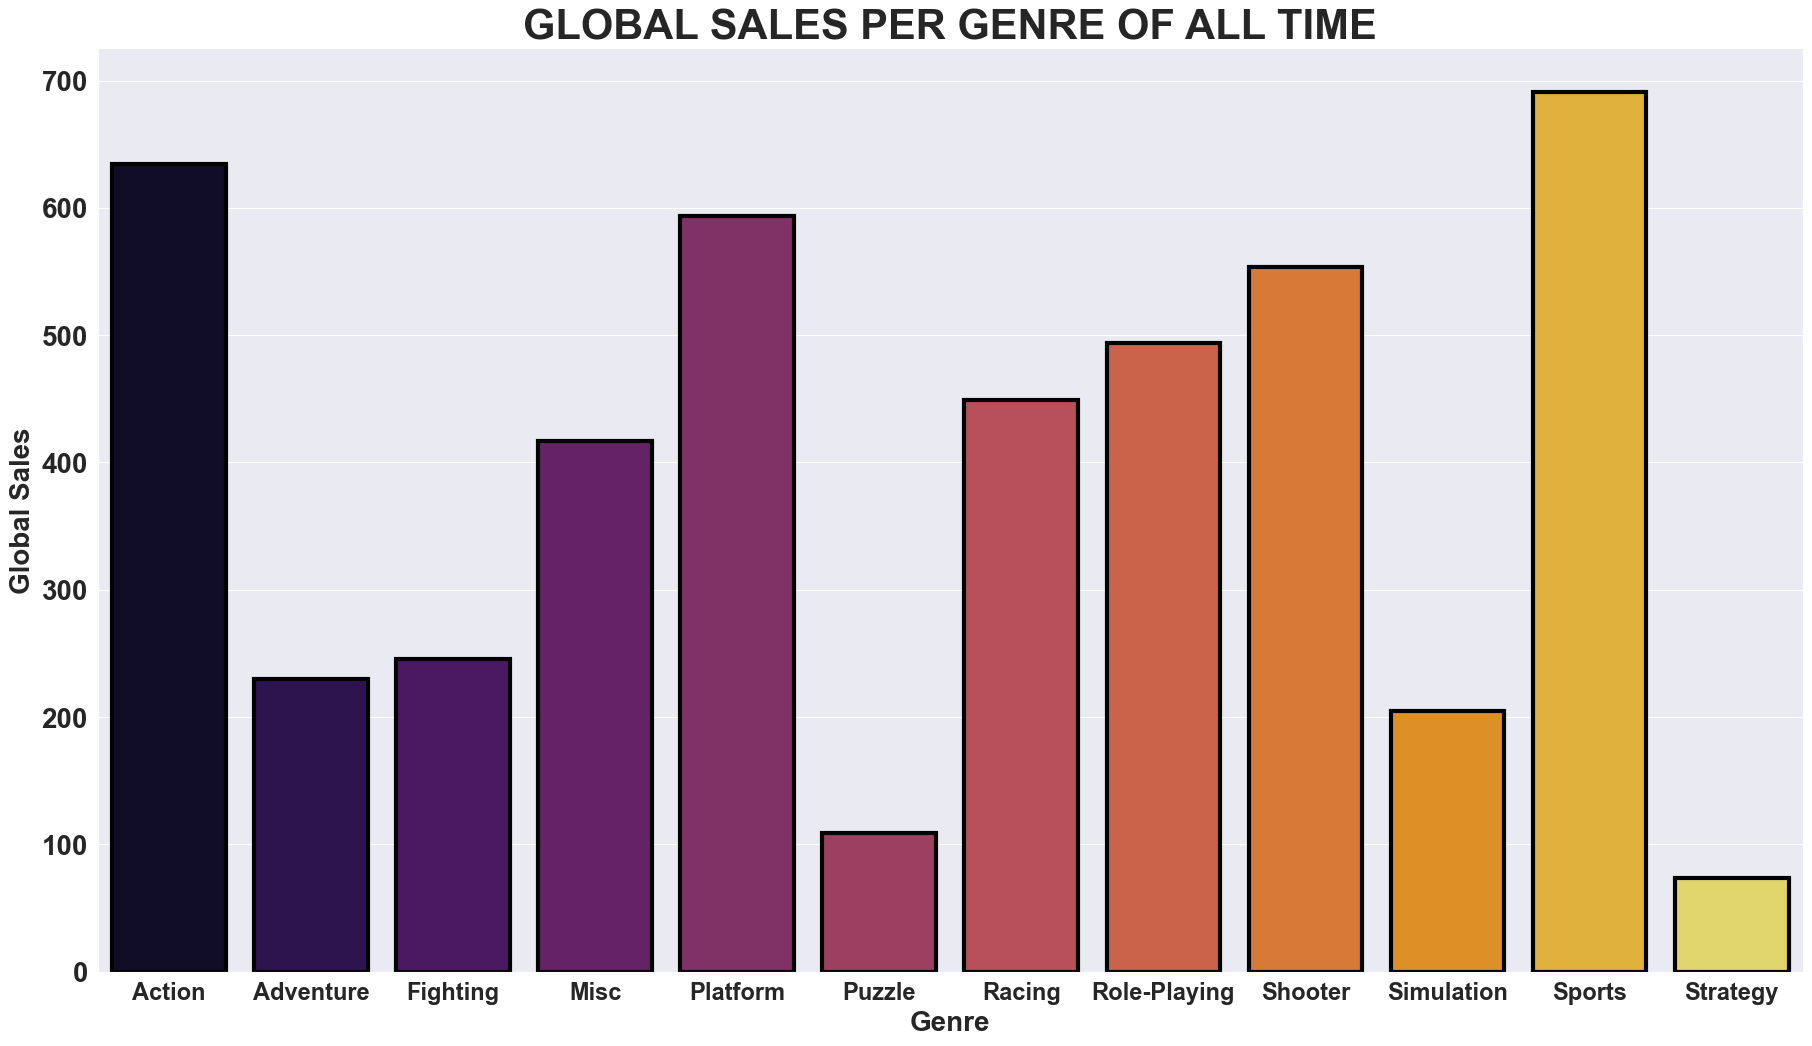

In [14]:
# We'll use our Sales_Per_Genre data-set and plot a barplot to analyse it:

plt.figure(figsize = (22,12)) # Scaling the figure size for better readability

sns.set_style('darkgrid')
plt.xticks(fontsize =17,fontweight = 'bold')   # Beautifying the plot by adding grids and inc. ticks size
plt.yticks(fontsize = 20,fontweight = 'bold') 

plt.title('GLOBAL SALES PER GENRE OF ALL TIME',fontsize = 30,fontweight = 'bold') # Adding title

sns.barplot(data = Sales_Per_Genre , x ='Genre',y = 'Global',palette = 'inferno',lw =3, edgecolor = 'black') # Plotting

plt.xlabel('Genre', fontsize = 20,fontweight = 'bold')             # Adding labels to x & y axis
plt.ylabel('Global Sales', fontsize = 20,fontweight = 'bold') 

### Analysis:-

1) Sports games has the most no. of units sold globally from 1983-2012

2) Then Action games 

3) And then Platform games

4) Puzzle and strategy games are the least sold games of all time

## ---------------------------------------------------------------------------------------------------------

## (iv) Analysing Sales Per Publisher Of All Time:-

Text(0, 0.5, 'Publishers')

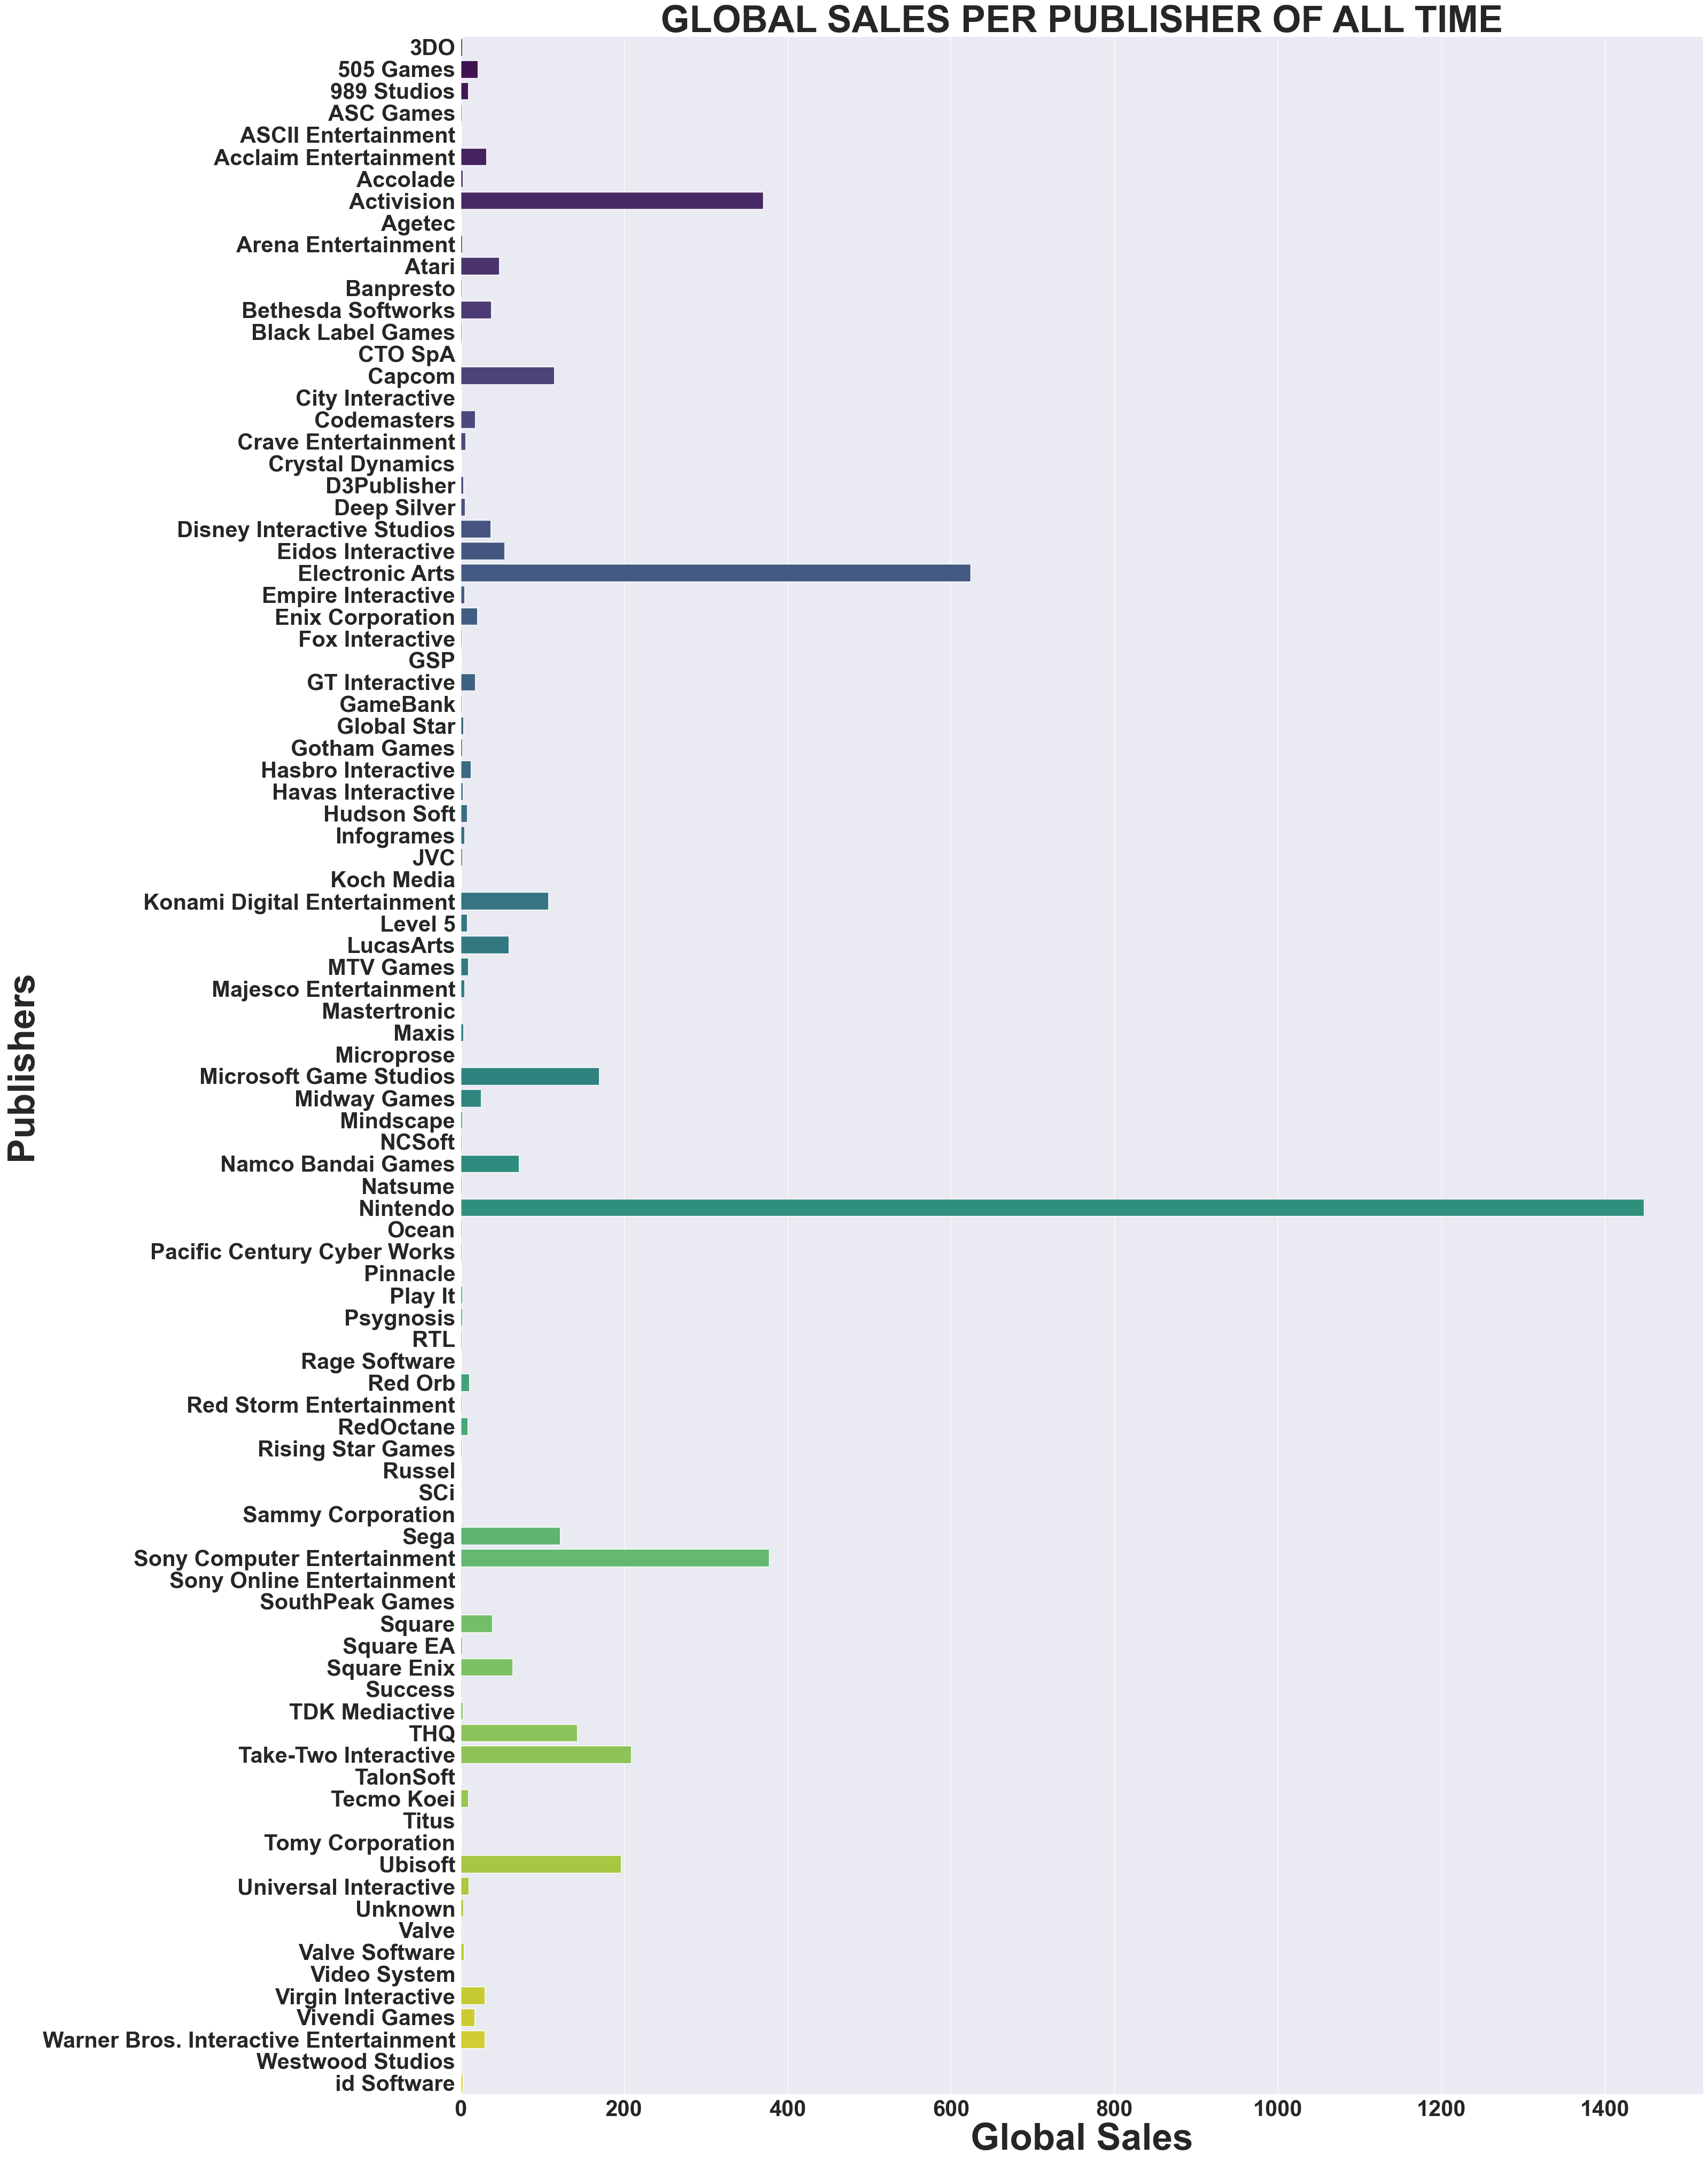

In [15]:
# We'll use our Sales_Per_Publisher data-set and plot a barplot to analyse it:

plt.figure(figsize = (30,50)) # Scaling the figure size for better readability

sns.set_style('darkgrid')
plt.xticks(fontsize =30,fontweight = 'bold')   # Beautifying the plot by adding grids and inc. ticks size
plt.yticks(fontsize = 30,fontweight = 'bold') 

plt.title('GLOBAL SALES PER PUBLISHER OF ALL TIME',fontsize = 50,fontweight = 'bold') # Adding title

sns.barplot(data = Sales_Per_Publisher , y ='Publisher',x = 'Global',palette = 'viridis') # Plotting

plt.xlabel('Global Sales', fontsize = 50,fontweight = 'bold')             # Adding labels to x & y axis
plt.ylabel('Publishers', fontsize = 50,fontweight = 'bold') 

### Analysis:-

1) We can see Nintendo has made the most global sales , hence it is a famous publisher

2) After Nintendo comes Electronic Arts on the 2nd place

3) After Electronic Arts comes Activision and Sony Computer Entertainment , all these are some of the popular publishers of all time

## ---------------------------------------------------------------------------------------------------------

## (v) Analysing Changing Trends Of Genres Over The Year:-

In [16]:
trends.head()

,Genre,Year,Global
67,Misc,1983,2.14
88,Platform,1983,5.62
231,Sports,1983,3.20
116,Puzzle,1984,1.10
138,Racing,1984,5.68


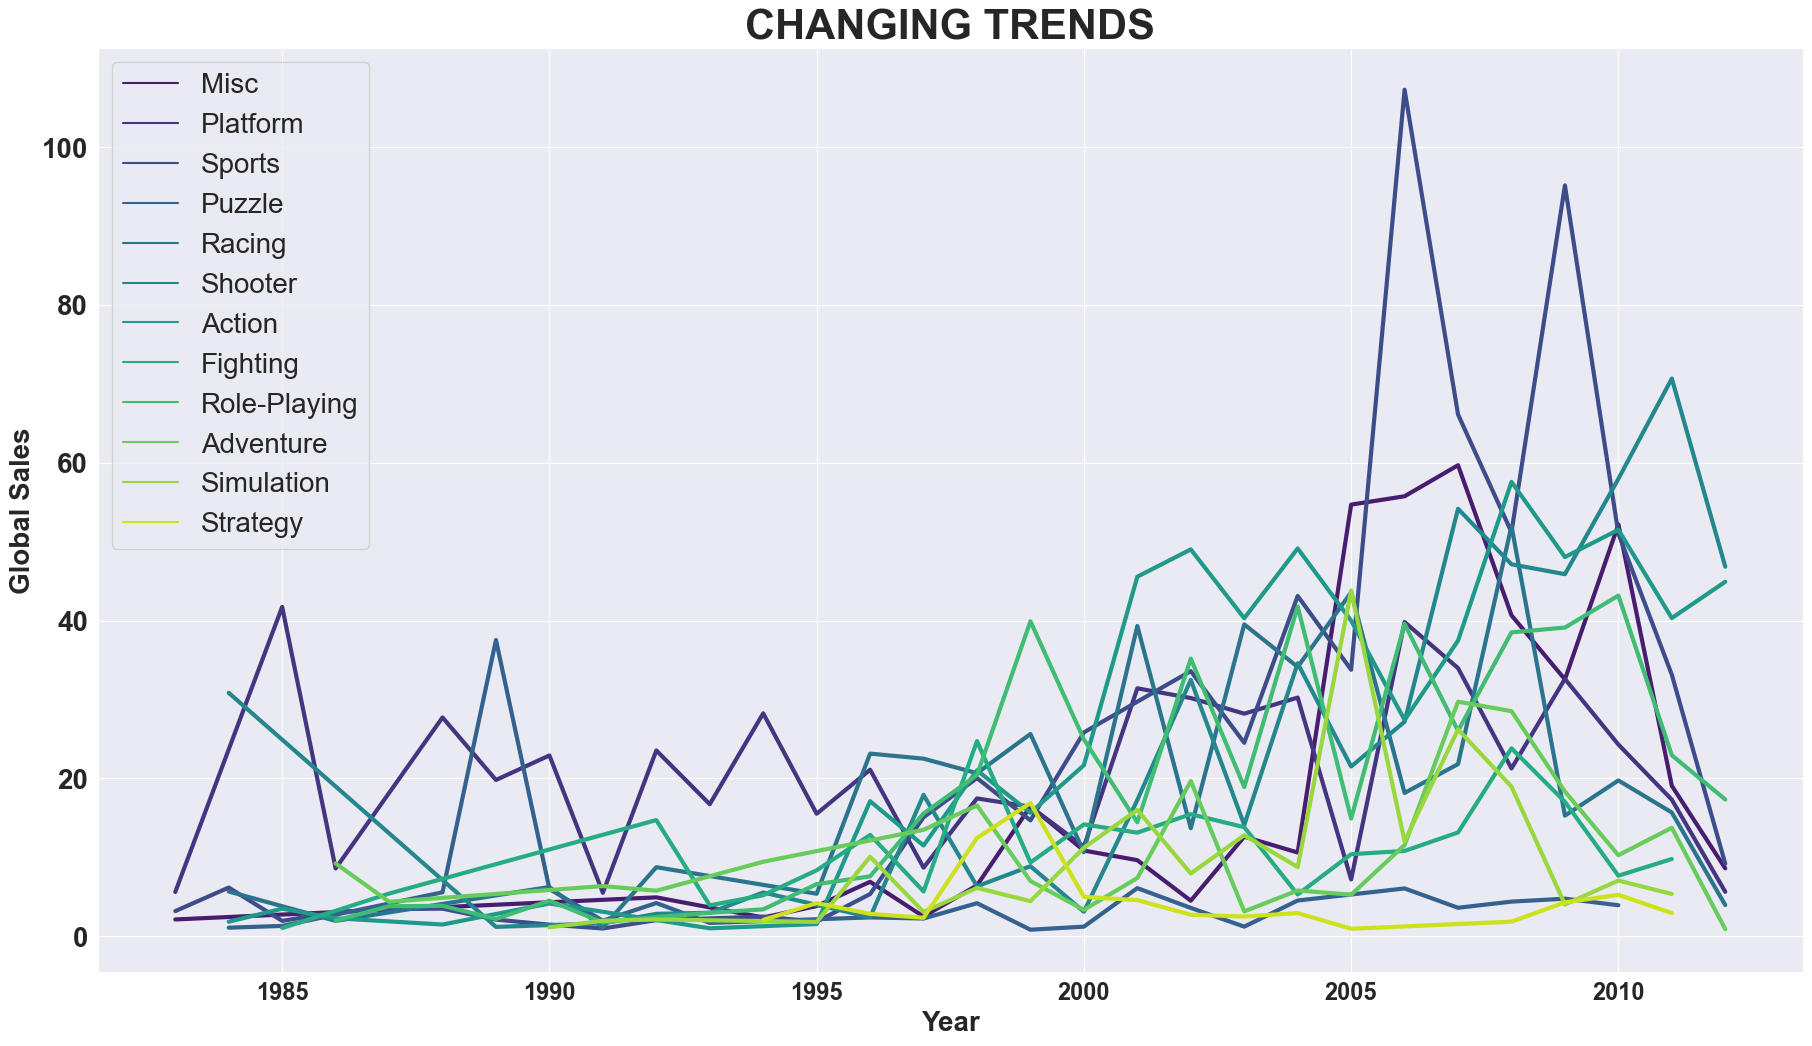

In [21]:
# We'll use our Total_Global_Sales data-set and plot a line to analyse it:

plt.figure(figsize = (22,12)) # Scaling the figure size for better readability

sns.set_style('darkgrid')
plt.xticks(fontsize =17,fontweight = 'bold')   # Beautifying the plot by adding grids and inc. ticks size
plt.yticks(fontsize = 20,fontweight = 'bold') 

plt.title('CHANGING TRENDS',fontsize = 30,fontweight = 'bold') # Adding title

sns.lineplot(data = trends , x ='Year',y = 'Global',palette = 'viridis',lw =3, hue = 'Genre') # Plotting

plt.xlabel('Year', fontsize = 20,fontweight = 'bold')             # Adding labels to x & y axis
plt.ylabel('Global Sales', fontsize = 20,fontweight = 'bold') 
plt.legend(fontsize = 20)

### Analysis:-

1) MISC:- It was almost non-existant till 1983 but by 2005 it's sales peaked and then after 2010 it saw it's downfall.

2) Platform:- It came in trend in 1985 and it's sales increased and was maximum just after 2005 , still after that it was in trend but after 2010 it saw it's downfall.

3) Strategy:- This genre had the lowest sales as compared to others

4) Similarly rest of the trends can be interpreted from the lineplot

## ---------------------------------------------------------------------------------------------------------

## (vi) Analysing Popularity Of Different Platforms:-

In [ ]:
# We'll use our Platform_Pop data-set and plot a barplot to analyse it:

plt.figure(figsize = (22,12)) # Scaling the figure size for better readability

sns.set_style('darkgrid')
plt.xticks(fontsize =17,fontweight = 'bold')   # Beautifying the plot by adding grids and inc. ticks size
plt.yticks(fontsize = 20,fontweight = 'bold') 

plt.title('POPULARITY OF PLATFORMS',fontsize = 30,fontweight = 'bold') # Adding title

sns.barplot(data = Platform_Pop , x ='Platform',y = 'Global',palette = 'inferno',lw =3, edgecolor = 'black') # Plotting

plt.xlabel('Platforms', fontsize = 20,fontweight = 'bold')             # Adding labels to x & y axis
plt.ylabel('Global Sales', fontsize = 20,fontweight = 'bold') 

### Analysis:-

1) Most of the games of PS2 platform is sold , this means PS2 is the favourite platform of all time 

2) From this plot we can observe that Gaming Consoles are most popular amongs Video Game consumer , unlike PC and other handheld devices

## ---------------------------------------------------------------------------------------------------------